In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# PopulationDataLoader class
class PopulationDataLoader:

    # Initializes the PopulationDataLoader with the URL of the Parquet file.
    def __init__(self, url):
        self.url = url
        self.df = None

    # Loads the population data from the specified URL into a pandas DataFrame.
    def load_data(self):  
        self.df = pd.read_parquet(self.url)
        return self.df

In [5]:
URL = "https://storage.dosm.gov.my/population/population_state.parquet"
loader = PopulationDataLoader(URL)
df = loader.load_data()
df

,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
1,Johor,1970-01-01,both,0-4,overall,210.1
2,Johor,1970-01-01,both,5-9,overall,215.7
3,Johor,1970-01-01,both,10-14,overall,192.2
4,Johor,1970-01-01,both,15-19,overall,152.8
...,...,...,...,...,...,...
257290,W.P. Putrajaya,2024-01-01,male,85+,bumi_other,0.0
257291,W.P. Putrajaya,2024-01-01,male,85+,chinese,0.0
257292,W.P. Putrajaya,2024-01-01,male,85+,indian,0.0
257293,W.P. Putrajaya,2024-01-01,male,85+,other_citizen,0.0


In [6]:
df.describe()
# df.info()

,population
count,257295.000000
mean,35.859336
std,155.745595
min,0.000000
25%,0.300000
50%,3.300000
75%,21.900000
max,7363.400000


In [7]:
# df[df["state"].isna()]
# df[df["date"].isna()]
# df[df["sex"].isna()]
# df[df["age"].isna()]
# df[df["ethnicity"].isna()]
df[df["population"].isna()]


,state,date,sex,age,ethnicity,population


In [12]:
display(df.head())

,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
1,Johor,1970-01-01,both,0-4,overall,210.1
2,Johor,1970-01-01,both,5-9,overall,215.7
3,Johor,1970-01-01,both,10-14,overall,192.2
4,Johor,1970-01-01,both,15-19,overall,152.8


In [10]:
# Group by state and process the data
grp_state = df.groupby("state")

population_list = []

for grp, grp_info in grp_state:
    state_dict = {}
    
    state_dict["state"] = grp
    state_dict["ethnicity_count"] = grp_info["ethnicity"].nunique()
    state_dict["population_sum"] = grp_info["population"].sum()
    state_dict["unique_age_groups"] = grp_info["age"].nunique()
    state_dict["sex_count"] = grp_info["sex"].nunique()
    state_dict["min_date"] = grp_info["date"].min()
    state_dict["max_date"] = grp_info["date"].max()
    
    population_list.append(state_dict)

df_processed = pd.DataFrame(population_list)
df_processed



,state,ethnicity_count,population_sum,unique_age_groups,sex_count,min_date,max_date
0,Johor,9,1091988.0,21,3,1970-01-01,2024-01-01
1,Kedah,9,655399.7,21,3,1970-01-01,2024-01-01
2,Kelantan,9,545676.0,21,3,1970-01-01,2024-01-01
3,Melaka,9,272974.4,21,3,1970-01-01,2024-01-01
4,Negeri Sembilan,9,344915.1,21,3,1970-01-01,2024-01-01
5,Pahang,9,495157.8,21,3,1970-01-01,2024-01-01
6,Perak,9,860341.1,21,3,1970-01-01,2024-01-01
7,Perlis,9,83258.1,21,3,1970-01-01,2024-01-01
8,Pulau Pinang,9,534835.8,21,3,1970-01-01,2024-01-01
9,Sabah,9,976234.8,21,3,1970-01-01,2024-01-01


In [19]:
def save_to_csv(df, filename):
    df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

save_to_csv(df_processed, 'processed_population_data.csv')

Data saved to processed_population_data.csv


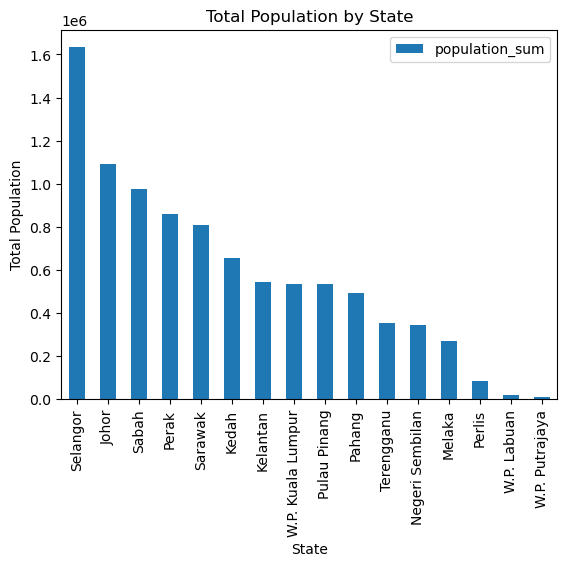

In [36]:
import matplotlib.pyplot as plt

def plot_population_trends(df):
    df.sort_values('population_sum', ascending=False).plot(kind='bar', x='state', y='population_sum', legend=True)
    plt.title('Total Population by State')
    plt.xlabel('State')
    plt.ylabel('Total Population')
    plt.show()

plot_population_trends(df_processed)


In [43]:
def calculate_population_statistics(df):
    mean_population = df['population_sum'].mean()
    median_population = df['population_sum'].median()
    return mean_population, median_population

mean_population, median_population = calculate_population_statistics(df_processed)
print(f"Mean Population: {mean_population}")
print(f"Median Population: {median_population}")


Mean Population: 576651.7375
Median Population: 534850.95


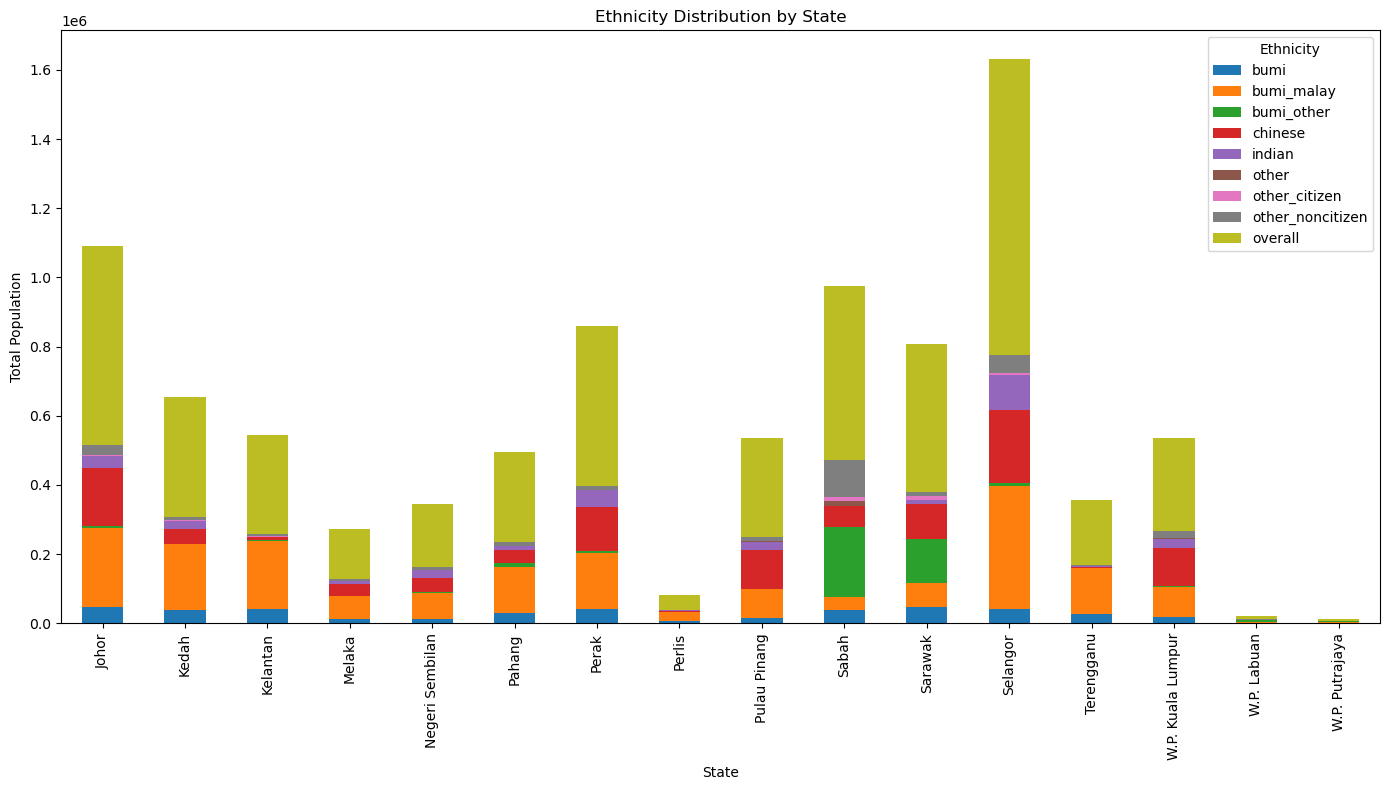

In [48]:
# Group by state and ethnicity to calculate population by ethnicity
ethnicity_distribution = df.groupby(['state', 'ethnicity'])['population'].sum().unstack().fillna(0)

# Plot ethnicity distribution for each state
ethnicity_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Ethnicity Distribution by State')
plt.xlabel('State')
plt.ylabel('Total Population')
plt.legend(title='Ethnicity', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


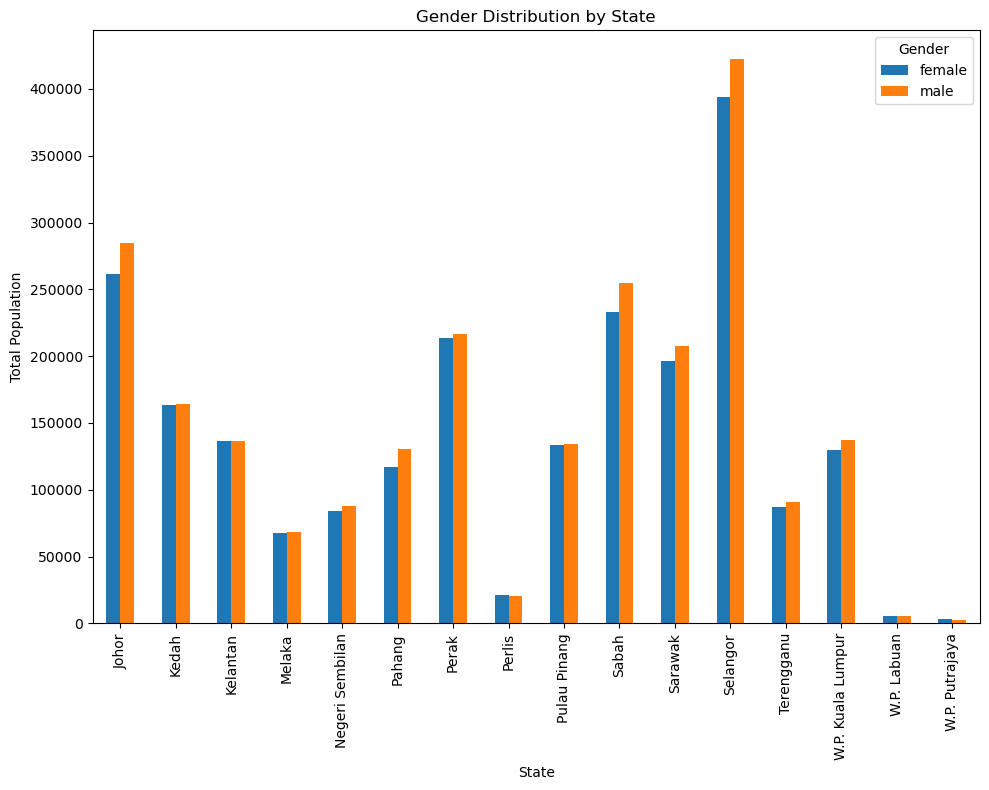

In [65]:
# Show the gender population in each state 
# 'both' is excluded here, 'female' and 'male' have been showed in the figure
df_exclude_both = df[df['sex'] != 'both']

gender_distribution = df_exclude_both.groupby(['state', 'sex'])['population'].sum().unstack().fillna(0)

gender_distribution.plot(kind='bar',figsize=(10, 8))
plt.title('Gender Distribution by State')
plt.xlabel('State')
plt.ylabel('Total Population')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


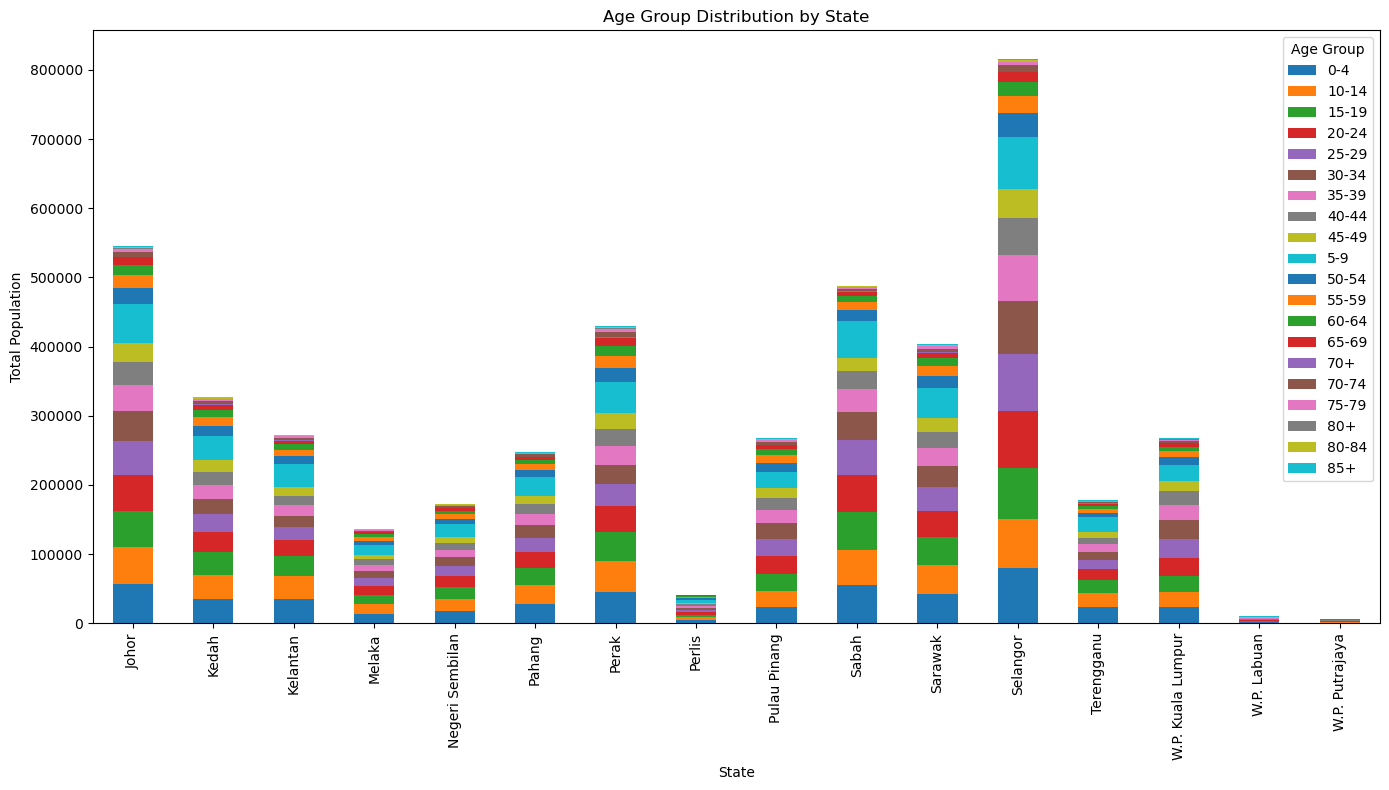

In [72]:
# Show the age group population in each state 

df_exclude_overall = df[df['age'] != 'overall']

age_distribution = df_exclude_overall.groupby(['state', 'age'])['population'].sum().unstack().fillna(0)

age_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Age Group Distribution by State')
plt.xlabel('State')
plt.ylabel('Total Population')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


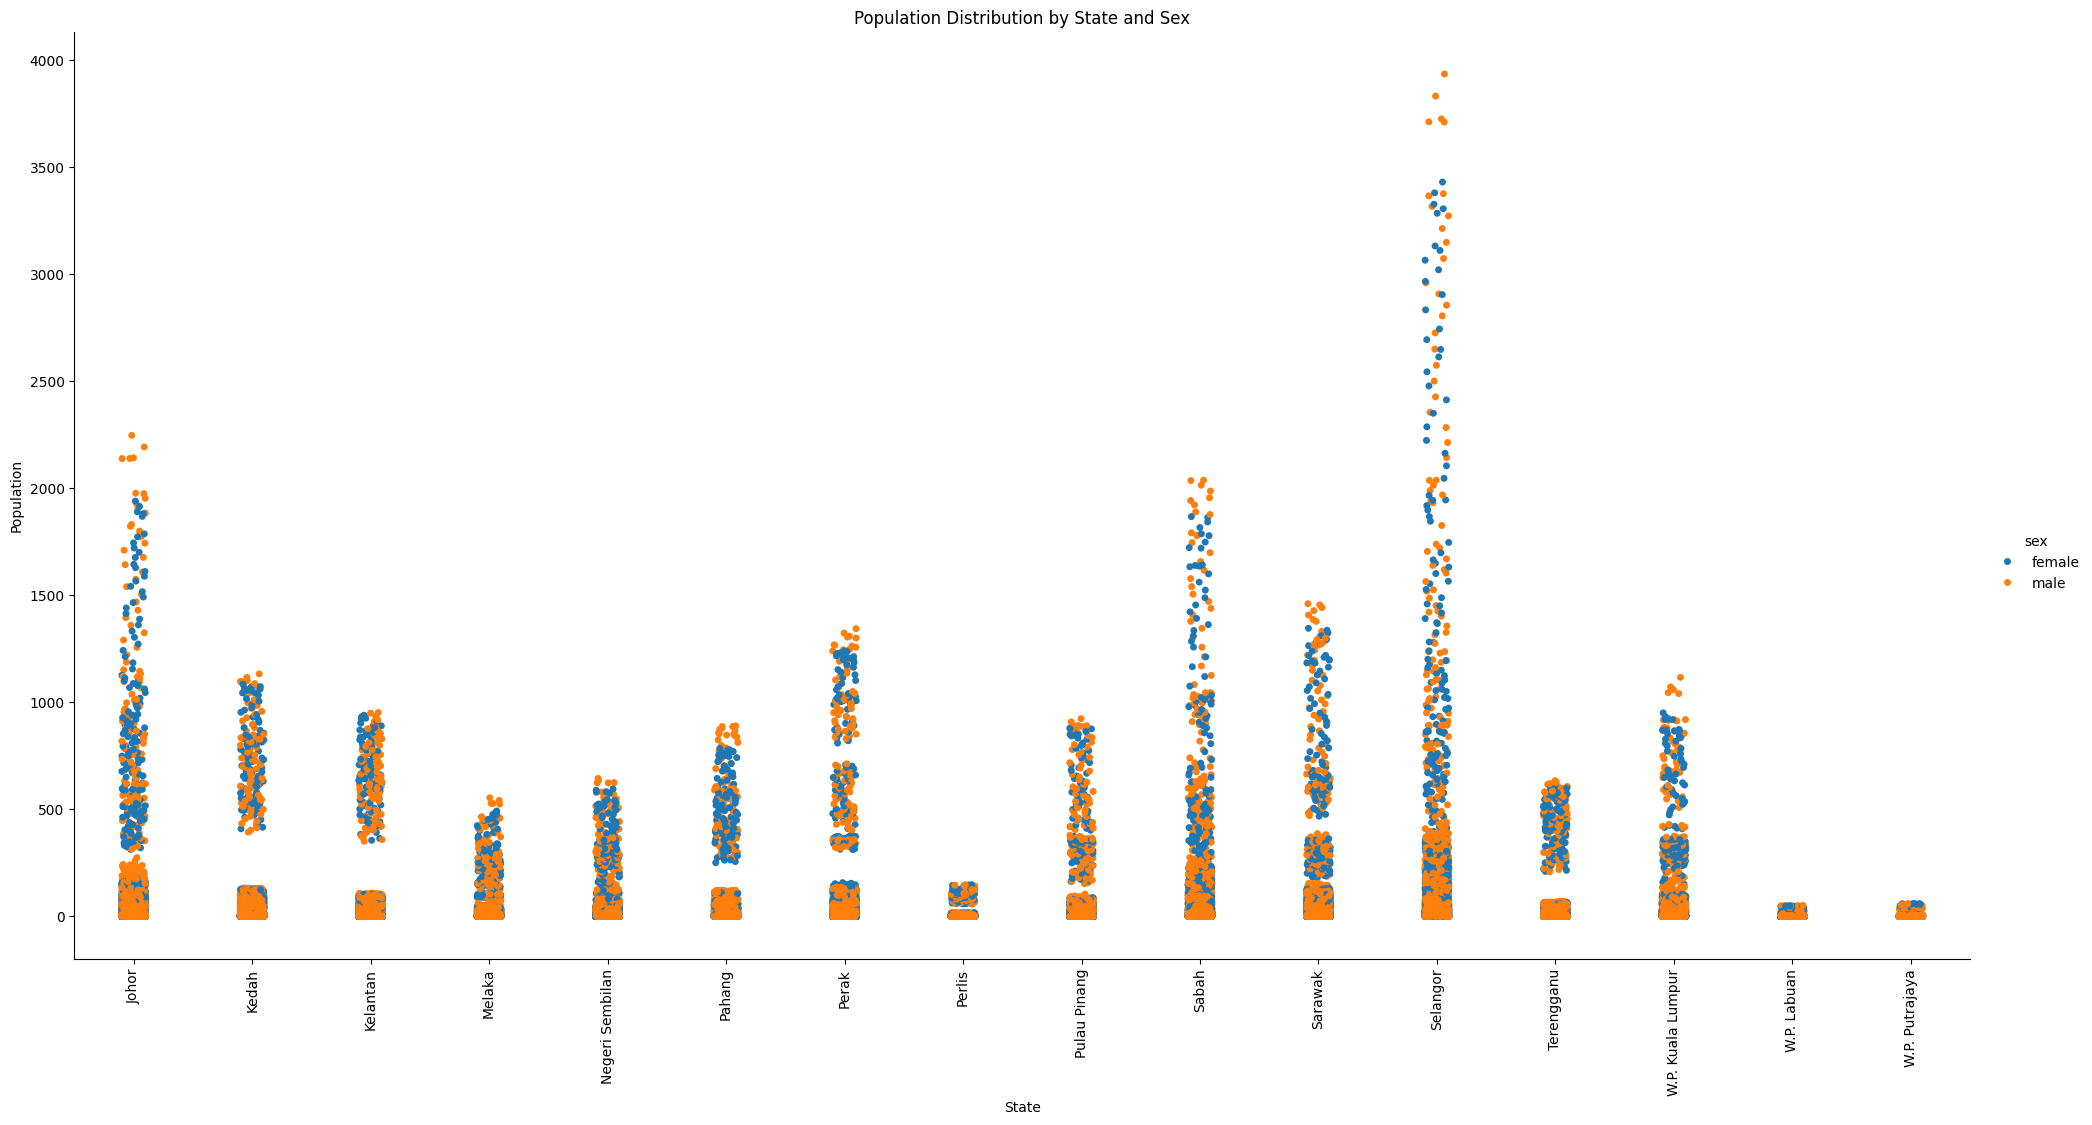

In [13]:
df_filtered = df[df['sex'] != 'both']
sns.catplot(x="state", y="population", hue="sex", kind="strip", data=df_filtered, height=10, aspect=2)
plt.title('Population Distribution by State and Sex')
plt.xlabel('State')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.show()
